# **좌석 시야각 구하기**

In [153]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import math
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

plt.rcParams['axes.unicode_minus'] = False
sns.set(rc=rc)

In [154]:
seat_information = pd.read_csv("C:/Users/whileduck/Desktop/Github/Concert-Hall-Price-Model/data/seat_coordinate_info (symmetry point).csv")

In [155]:
coordinate = np.array(seat_information[['X','Y','Z']])

coordinate

array([[ 1451,   542,   -93],
       [ 1406,   555,   -93],
       [ 1361,   568,   -93],
       ...,
       [-1454,   617,   428],
       [-1522,   677,   483],
       [-1568,   624,   483]], dtype=int64)

# **좌우 상하 시야각 구하기**

$Cos \theta = \frac{X\cdot Y}{|X| \cdot |Y|}$

In [156]:
lower_angles = []

lower_left_stage = np.array([542.3, -800, 618])
lower_right_stage = np.array([-542.3, -800, 618]) 

for point in coordinate:
    
    left_vector = lower_left_stage - point
    right_vector = lower_right_stage - point
    
    left_distance = np.linalg.norm(left_vector)
    right_distance = np.linalg.norm(right_vector)
    
    dot_product = np.dot(left_vector, right_vector.T)
    
    if left_distance == 0.0 or right_distance == 0.0:
        angle = 0.0  
    else:
        cos = np.clip(dot_product / (left_distance * right_distance), -1.0, 1.0)
        radian = np.arccos(cos)
        degree = np.degrees(radian)
        lower_angles.append(degree)

In [157]:
upper_angles = []

upper_left_angles = np.array([907.4, 318.3, 618])
upper_right_angles = np.array([-907.4, 318.3, 618])

for point in coordinate:
    
    upper_vector = upper_left_angles - point
    lower_vector = upper_right_angles - point
    
    left_distance = np.linalg.norm(upper_vector)
    right_distance = np.linalg.norm(lower_vector)
    
    dot_product = np.dot(upper_vector, lower_vector.T)
    
    if left_distance == 0.0 or right_distance == 0.0:
        angle = 0.0  
    else:
        cos = np.clip(dot_product / (left_distance * right_distance), -1.0, 1.0)
        radian = np.arccos(cos)
        degree = np.degrees(radian)
        upper_angles.append(degree)


In [158]:
seat_information['무대_밑_좌우시야각'] = lower_angles
seat_information['무대_위_좌우시야각'] = upper_angles

In [159]:
seat_information.head()

,층,블록,열,넘버,전체_좌석,X,Y,Z,대칭점,무대_밑_좌우시야각,무대_위_좌우시야각
0,1층,A블록,1,1,1층 A블록1열 1,1451,542,-93,1층 E블록1열 9,21.802320,36.357422
1,1층,A블록,1,2,1층 A블록1열 2,1406,555,-93,1층 E블록1열 8,22.411843,38.413296
2,1층,A블록,1,3,1층 A블록1열 3,1361,568,-93,1층 E블록1열 7,23.021978,40.578168
3,1층,A블록,1,4,1층 A블록1열 4,1315,580,-93,1층 E블록1열 6,23.648287,42.895501
4,1층,A블록,1,5,1층 A블록1열 5,1270,591,-93,1층 E블록1열 5,24.261872,45.261624


# **무대가 보이는 면적 구하기**

In [160]:
lower_right_stage = np.array([542.3, -800, 618])
lower_left_stage = np.array([-542.3, -800, 618]) 
upper_right_stage = np.array([907.4, 318.3, 618])
upper_left_stage = np.array([-907.4, 318.3, 618])

upper_center = np.array([0, 318.3, 618])
lower_center = np.array([0, -800, 618])

In [161]:
# 무대 모서리 점의 좌표 정의
lower_right_stage = np.array([542.3, -800, 618])
lower_left_stage = np.array([-542.3, -800, 618])
upper_right_stage = np.array([907.4, 318.3, 618])
upper_left_stage = np.array([-907.4, 318.3, 618])

# 두 점 사이의 거리 계산 함수
def distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# 두 벡터 사이의 각도 계산 함수 (라디안)
def angle_between_vectors(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude_product = np.linalg.norm(vector1) * np.linalg.norm(vector2)
    if magnitude_product == 0:
        return 0
    else:
        return np.arccos(np.clip(dot_product / magnitude_product, -1.0, 1.0))

# 삼각형과 사각형의 면적 계산 함수
def calculate_area(distances, angles):
    area = 0
    for i in range(len(distances)):
        if i == len(distances) - 1:
            # 마지막 모서리일 경우, 첫 번째 모서리와 이루는 삼각형 계산
            area += 0.5 * distances[i] * distances[0] * math.sin(angles[i])
        else:
            # 현재 모서리와 다음 모서리로 이루는 삼각형 계산
            area += 0.5 * distances[i] * distances[i+1] * math.sin(angles[i])
    return abs(area)

In [162]:
areas = []

for observation_point in coordinate:
    
    # 관찰 지점에서 무대의 각 모서리까지의 거리와 각도 계산
    distances = [
        distance(observation_point, lower_right_stage),
        distance(observation_point, lower_left_stage),
        distance(observation_point, upper_right_stage),
        distance(observation_point, upper_left_stage)
    ]

    angles = [
        angle_between_vectors(lower_right_stage - observation_point, lower_left_stage - observation_point),
        angle_between_vectors(lower_left_stage - observation_point, upper_left_stage - observation_point),
        angle_between_vectors(upper_left_stage - observation_point, upper_right_stage - observation_point),
        angle_between_vectors(upper_right_stage - observation_point, lower_right_stage - observation_point)
    ]

    distance_to_stage = np.linalg.norm(observation_point)

    # 무대에서 보이는 부분의 면적 계산
    stage_visible_area = calculate_area(distances, angles)
    # 거리를 고려하여 계산 
    actual_visible_area = stage_visible_area / distance_to_stage
    
    areas.append(actual_visible_area)

In [163]:
seat_information['무대가_보이는_면적'] = areas 

In [168]:
def seat_angle_visualization(coordinate, seat):
        
        global seat_information
        
        # 무대 좌표들 , CAD를 이용하여 좌석 좌표 추출
        
        left_stage = np.array([542.3, -800, 618])
        right_stage = np.array([-542.3, -800, 618]) 
        upper_stage = np.array([907.4, 318.3, 618])
        lower_stage = np.array([-907.4, 318.3, 618])

        fig,ax = plt.subplots(figsize = (30,10), subplot_kw = {'projection':'3d'}, ncols = 2)
        
        # 전체 좌석 좌표 찍기
        ax[0].scatter(data = coordinate,
                xs = 'X',
                ys = 'Y',
                zs = 'Z',
                c = 'blue',
                alpha = 0.05)
        
        ax[1].scatter(data = coordinate,
                xs = 'X',
                ys = 'Y',
                zs = 'Z',
                c = 'blue',
                alpha = 0.05)
        
        cond = coordinate['전체_좌석'] == seat
        current_location = np.array(coordinate[cond][['X','Y','Z']])[0]
        
        
        # seat 좌석 찍기
        ax[0].scatter(
                xs = current_location[0],
                ys = current_location[1],
                zs = current_location[2],
                c = 'red',
                s = 50,
                label = '현재 위치')
        
        ax[1].scatter(
                xs = current_location[0],
                ys = current_location[1],
                zs = current_location[2],
                c = 'red',
                s = 50,
                label = '현재 위치')
                
        
        # 좌우 point 좌표 찍고 벡터 표시
        
        for i,horizinal_point in enumerate([left_stage, right_stage]):
                point_label = vector_label = None
                
                if i == 1:
                        point_label = '윗 무대 좌우 포인트'
                        vector_label = '윗 무대 좌우 시야각'
                ax[0].scatter(
                        xs = horizinal_point[0],
                        ys = horizinal_point[1],
                        zs = horizinal_point[2],
                        c = 'green',
                        label = point_label
                )
                
                target_vector = horizinal_point - current_location
                
                ax[0].quiver(current_location[0],current_location[1],current_location[2],
                                target_vector[0],target_vector[1],target_vector[2],
                                color = 'green',
                                label = vector_label)
                
                ax[1].scatter(
                        xs = horizinal_point[0],
                        ys = horizinal_point[1],
                        zs = horizinal_point[2],
                        c = 'green',
                        label = point_label
                )
                
                target_vector = horizinal_point - current_location
                
                ax[1].quiver(current_location[0],current_location[1],current_location[2],
                                target_vector[0],target_vector[1],target_vector[2],
                                color = 'green',
                                label = vector_label)
                
        # 상하 point 좌표 찍기
        
        for i,vertical_point in enumerate([upper_stage, lower_stage]):
                
                point_label = vector_label = None
                
                if i == 1:
                        point_label = '밑 무대 좌우 포인트'
                        vector_label = '하 좌우 시야각'
                ax[0].scatter(
                        xs = vertical_point[0],
                        ys = vertical_point[1],
                        zs = vertical_point[2],
                        c = 'orange',
                        label = point_label
                )
                
                target_vector = vertical_point - current_location
                
                if i == 1:
                        point_label = '윗 무대 좌우 포인트'
                        vector_label = '윗 무대 상하 시야각'
                ax[0].quiver(current_location[0],current_location[1],current_location[2],
                                target_vector[0],target_vector[1],target_vector[2],
                                color = 'orange',
                                label = vector_label)
                
                
                ax[1].scatter(
                        xs = vertical_point[0],
                        ys = vertical_point[1],
                        zs = vertical_point[2],
                        c = 'orange',
                        label = point_label
                )
                
                target_vector = vertical_point - current_location
                
                if i == 1:
                        label = '상하 시야각'
                
                ax[1].quiver(current_location[0],current_location[1],current_location[2],
                                target_vector[0],target_vector[1],target_vector[2],
                                color = 'orange',
                                label = vector_label)
                
        upper_angles = round(seat_information[cond]['무대_위_좌우시야각'].values[0],2)
        lower_angles = round(seat_information[cond]['무대_밑_좌우시야각'].values[0],2)
        
        # 무대까지의 면적 그리기 

        
        for i in [0,1]:
                ax[i].set_box_aspect([3,3,1])
                ax[i].set_xlabel('X')
                ax[i].set_ylabel('Y')
                ax[i].set_zlabel('Z')
                ax[i].legend(loc = 'upper right')
        ax[0].view_init(15,20)
        ax[1].view_init(60,15)
        
        fig.suptitle(f'좌석 : {seat} \n 무대 위 좌우시야각 : {upper_angles} \n 무대 밑 좌우시야각 : {lower_angles}', fontsize = 20)
        

In [169]:
example_seat_list = seat_information.sample(5)['전체_좌석'].values

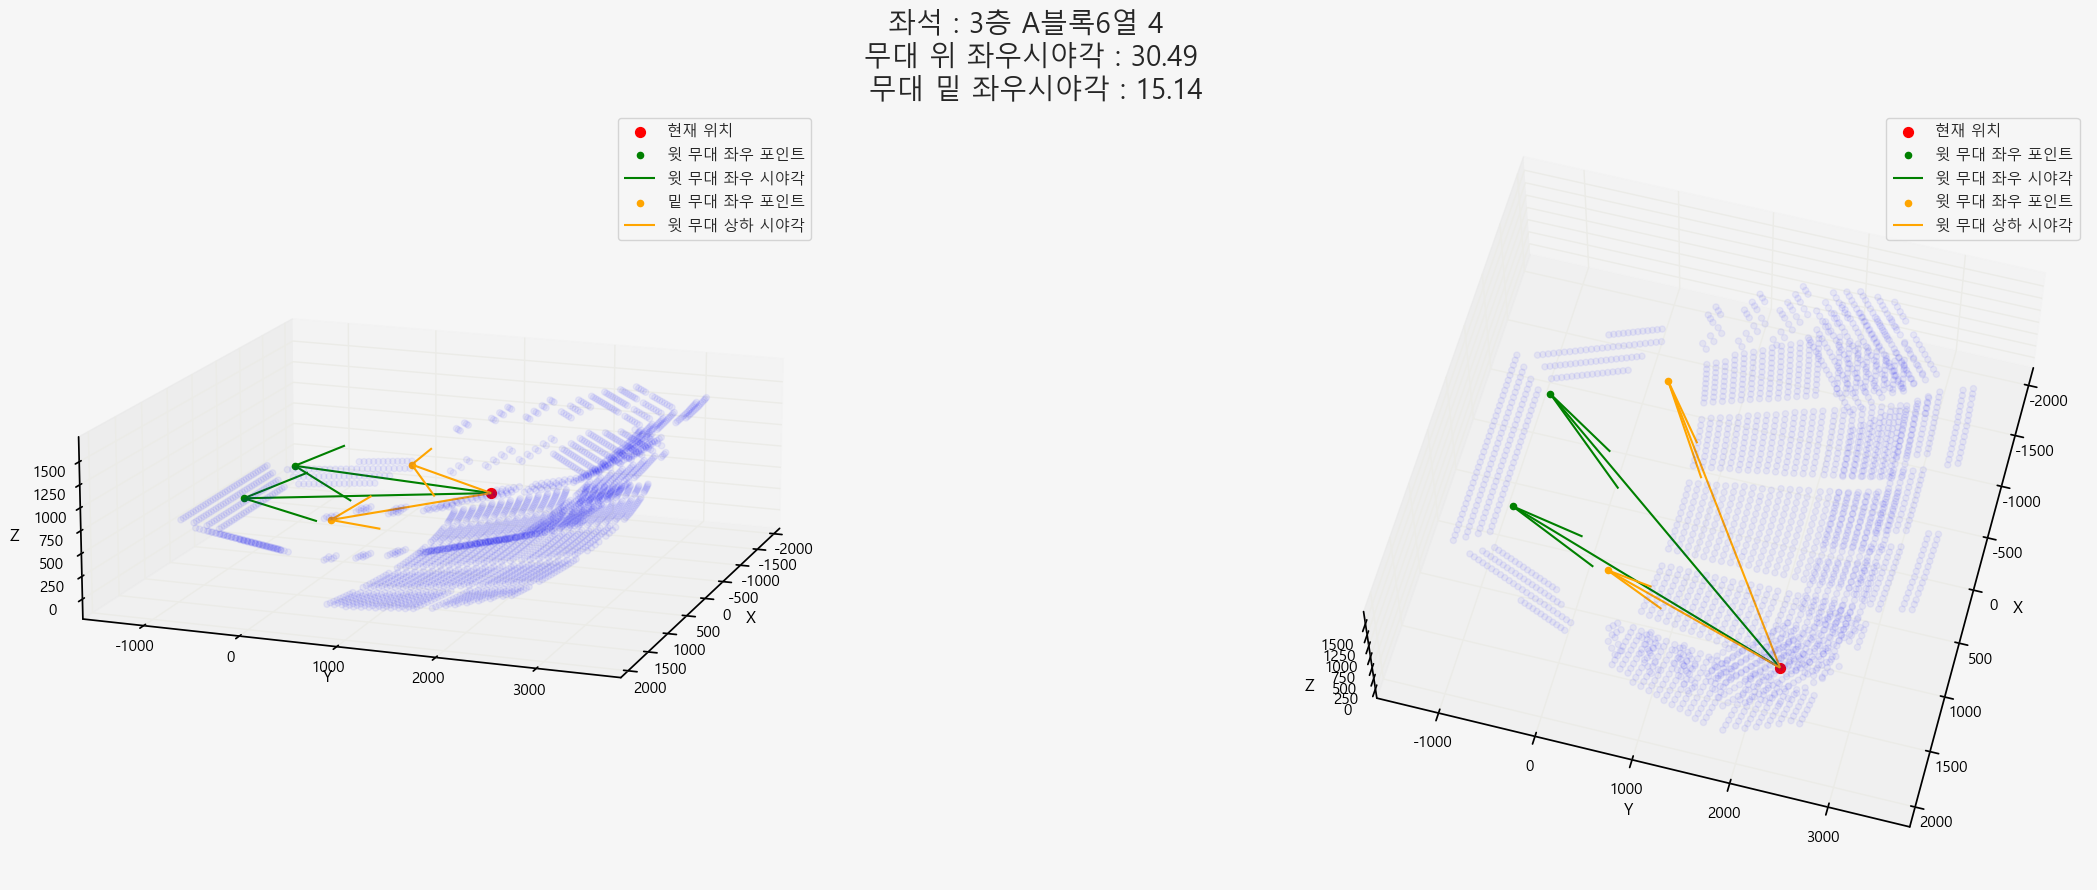

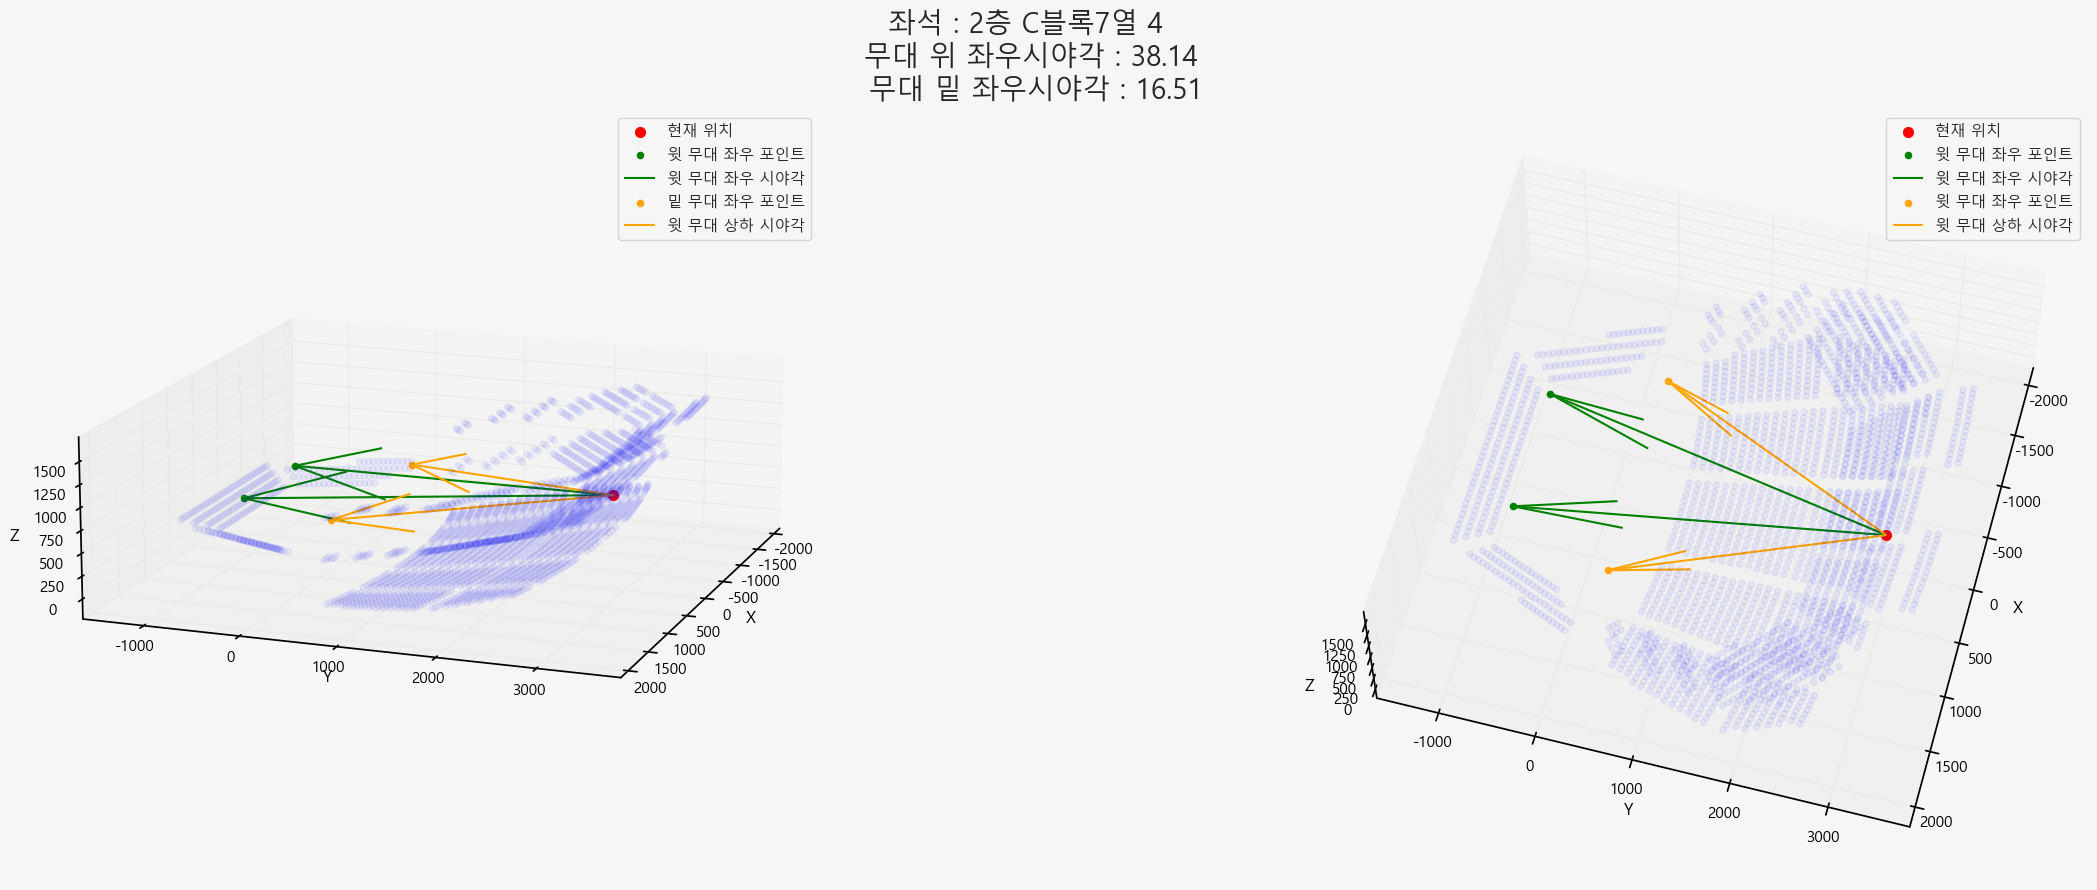

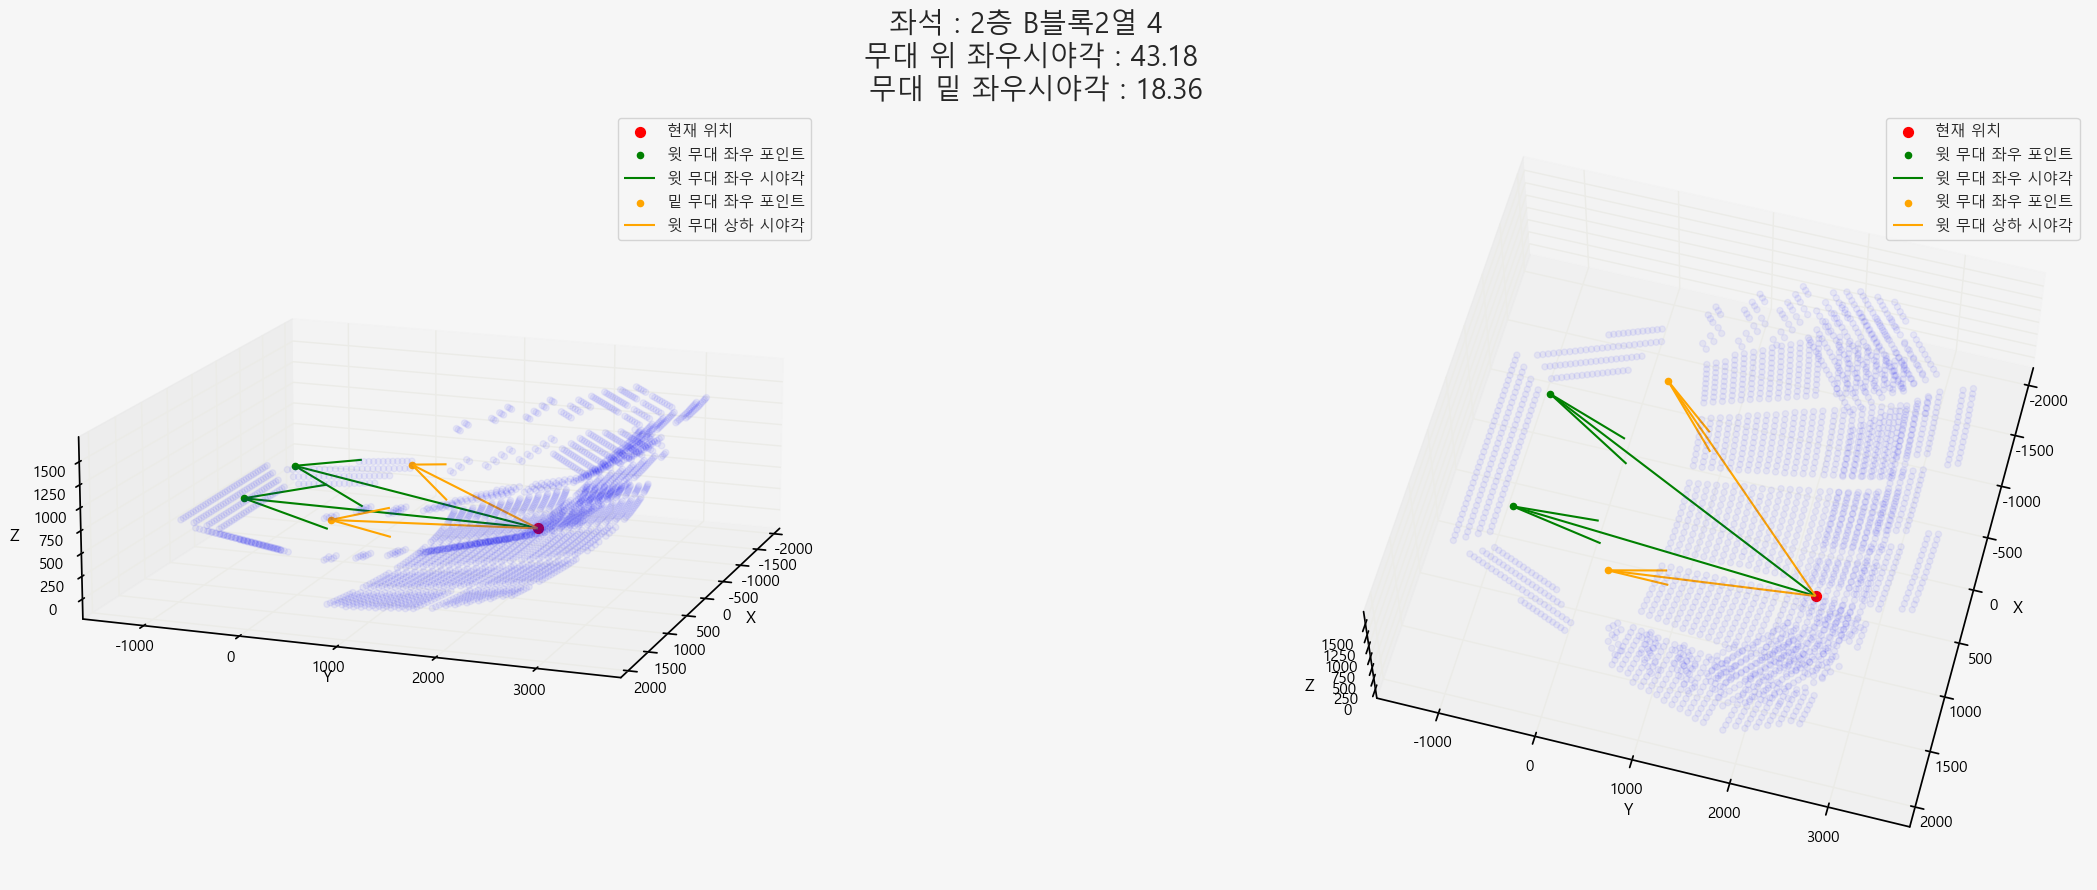

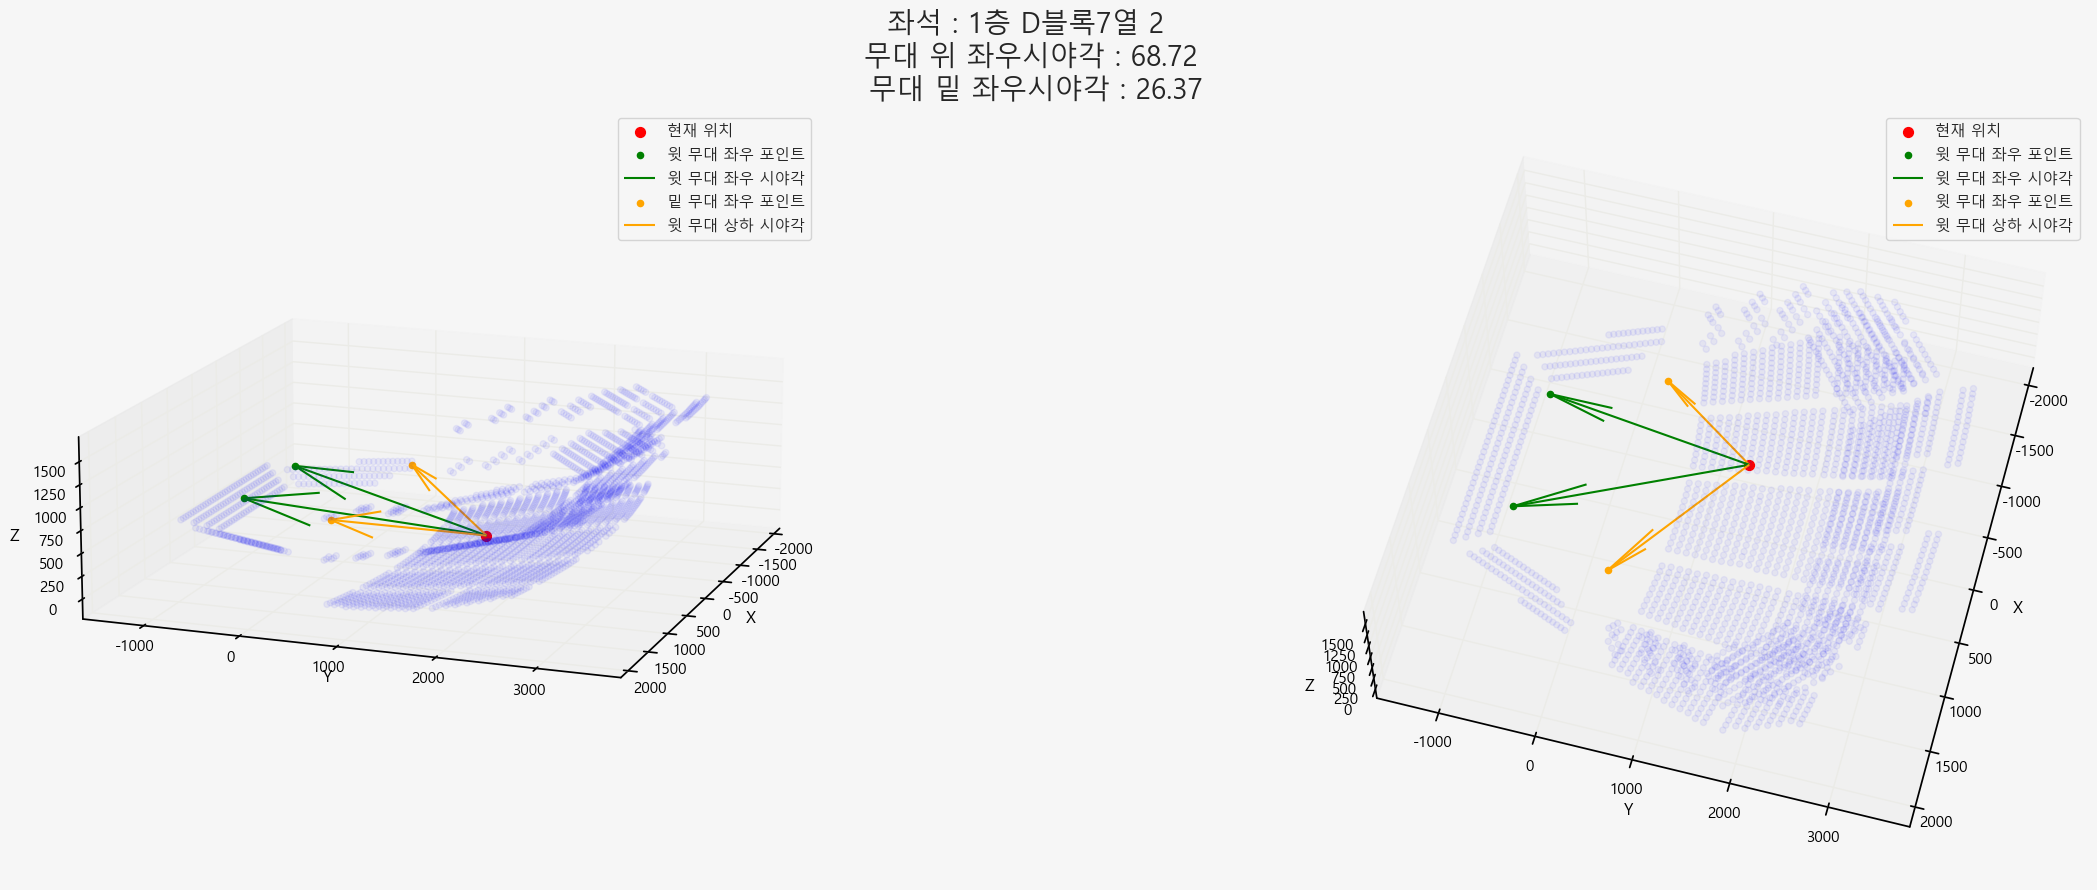

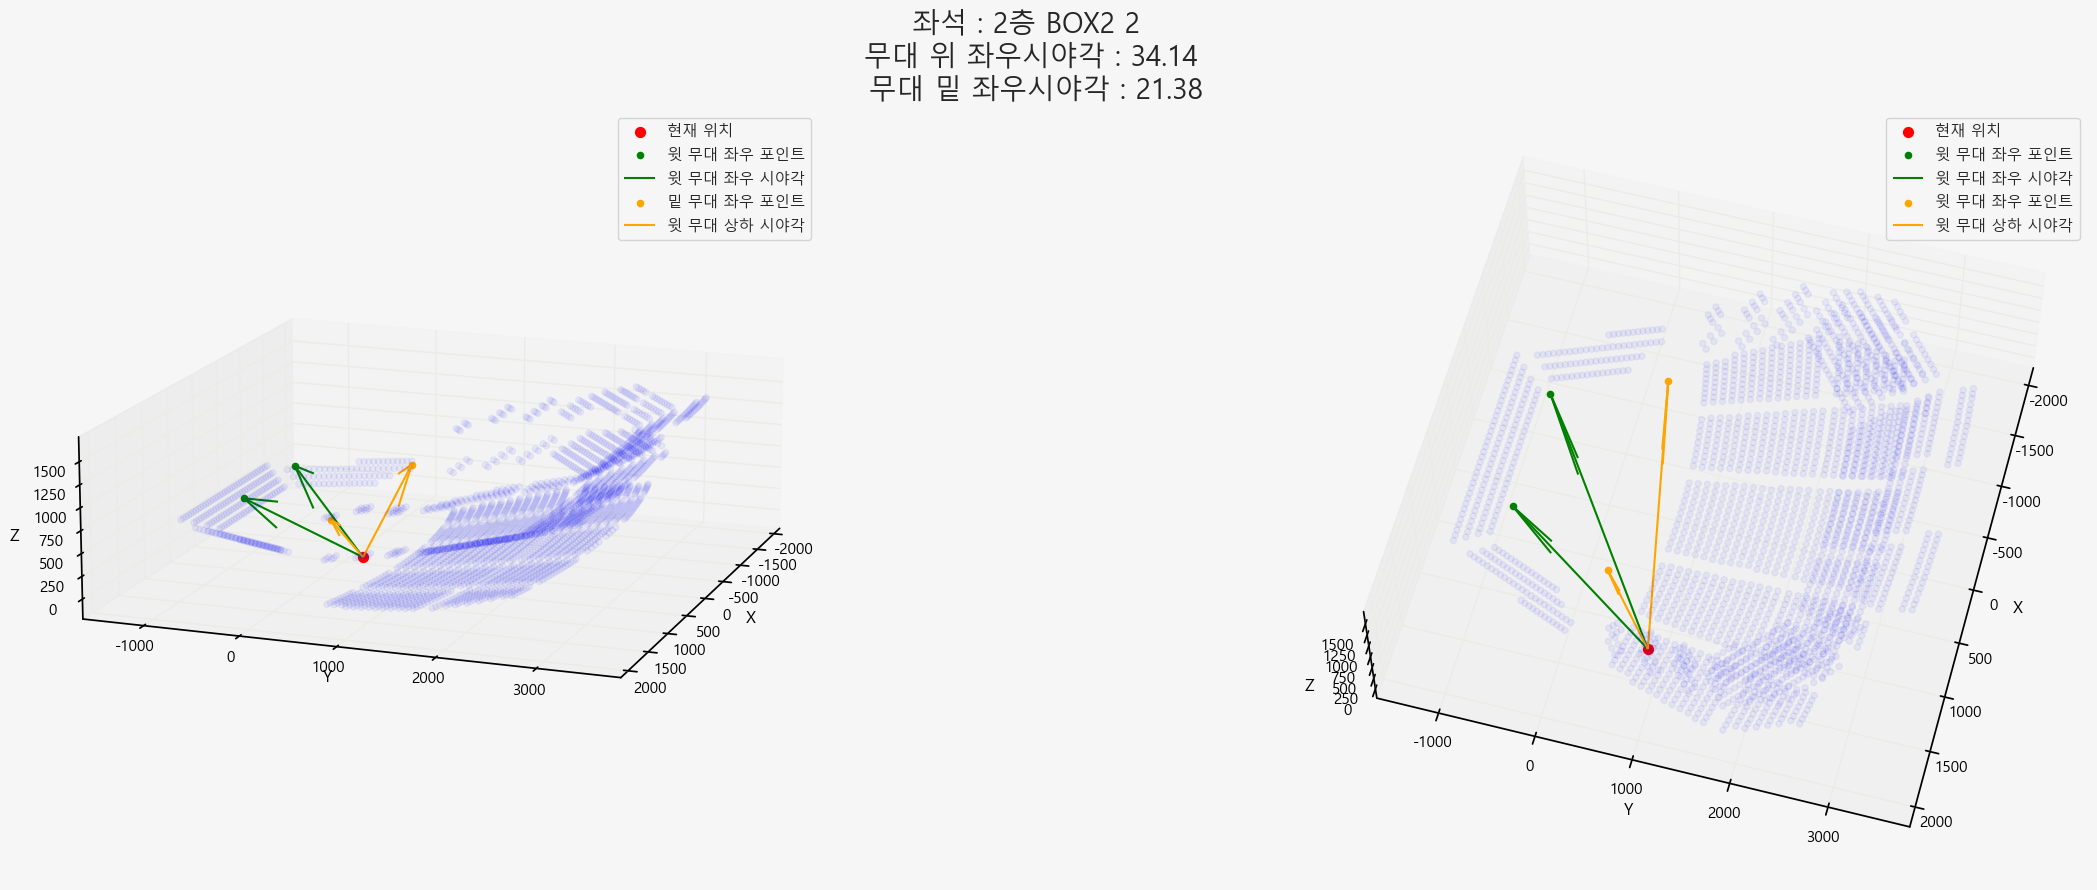

In [170]:
for example in example_seat_list:
    
    seat_angle_visualization(seat_information ,seat = example)    

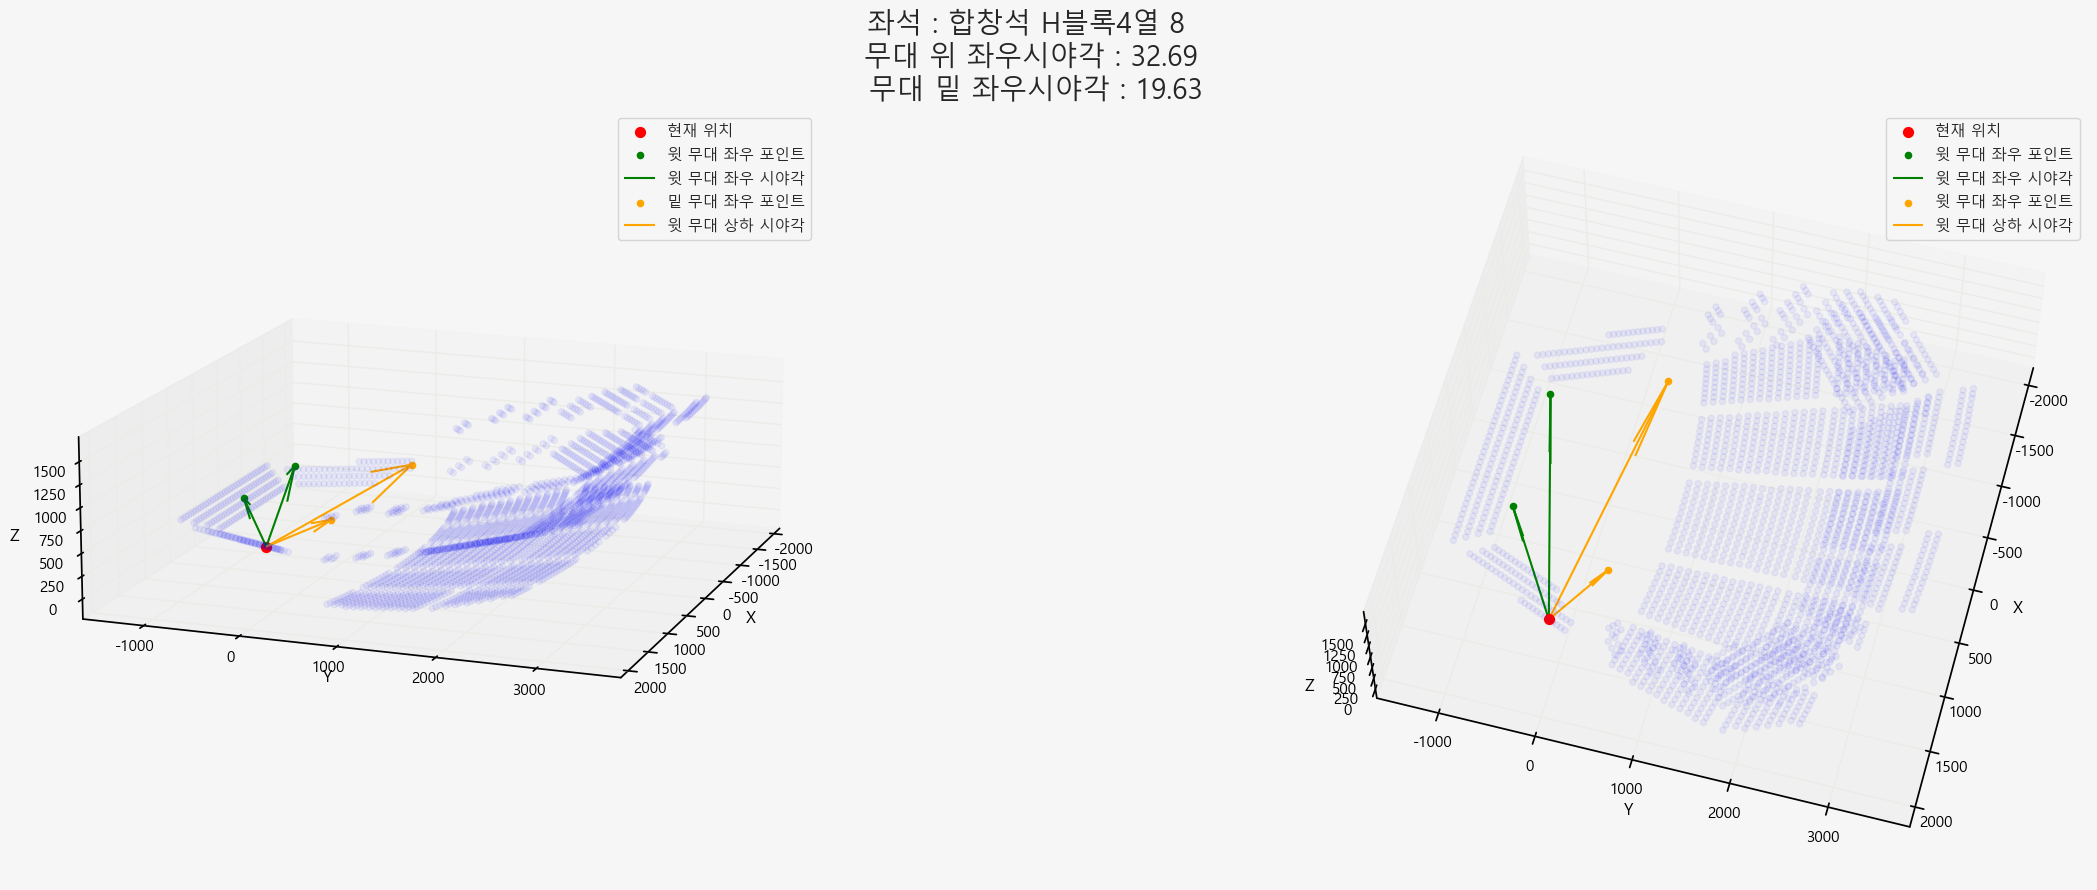

In [171]:
seat_angle_visualization(seat_information ,seat = '합창석 H블록4열 8')    

In [174]:
seat_information.to_csv('seat_information_with_area.csv',index = False)